# Photo recognition

Found 73 files belonging to 5 classes.
Found 30 files belonging to 5 classes.
Found 21 files belonging to 5 classes.
['1finger', '2fingers', '3fingers', '4fingers', '5fingers']


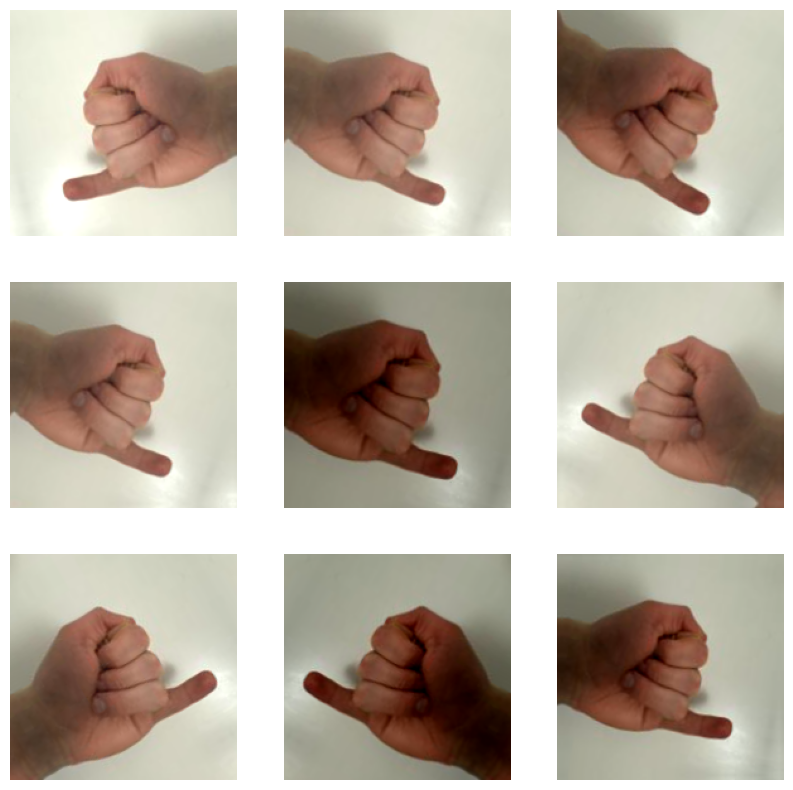

In [30]:
import os, shutil, pathlib
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.utils import image_dataset_from_directory

dir = pathlib.Path('../Photos-CNN/Photos/Train')
valDir = pathlib.Path('../Photos-CNN/Photos/Validation')
testDir = pathlib.Path('../Photos-CNN/Photos/Test')

train_dataset = image_dataset_from_directory(
    dir,
    image_size=(180, 180),
    batch_size=8,
    shuffle=True,
)

validation_dataset = image_dataset_from_directory(
    valDir,
    image_size = (180, 180),
    batch_size = 4,
)

test_dataset = image_dataset_from_directory(
    testDir,
    image_size=(180, 180),
    batch_size=4,
)

print(train_dataset.class_names)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.05),
        layers.RandomContrast(0.2),
        layers.RandomBrightness(0.2),
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images, training=True)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.2530 - loss: 3.2287 - val_accuracy: 0.3667 - val_loss: 1.5569
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.2990 - loss: 1.5384 - val_accuracy: 0.3667 - val_loss: 1.4552
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.2624 - loss: 1.5638 - val_accuracy: 0.3667 - val_loss: 1.4395
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3460 - loss: 1.5043 - val_accuracy: 0.3667 - val_loss: 1.5584
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3126 - loss: 1.5699 - val_accuracy: 0.3667 - val_loss: 1.4214
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3873 - loss: 1.4513 - val_accuracy: 0.3333 - val_loss: 1.4181
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.3054 - loss: 1.4532 - val_accuracy: 0.3667 - val_loss: 1.3970
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.2951 - loss: 1.5464 - val_accuracy: 0.

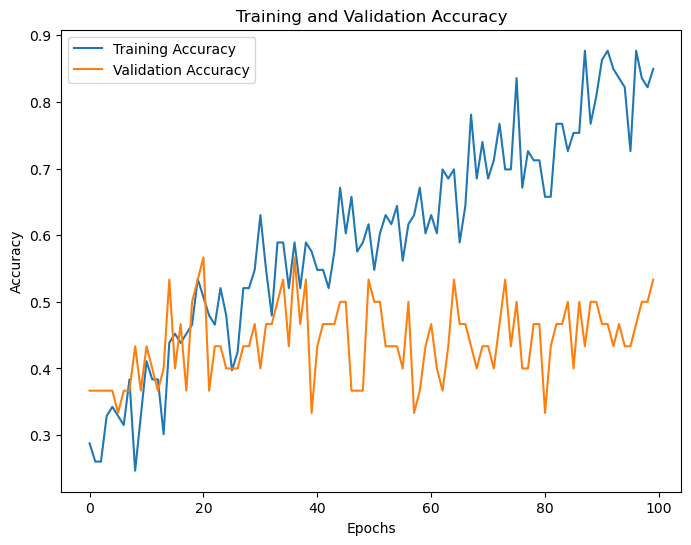

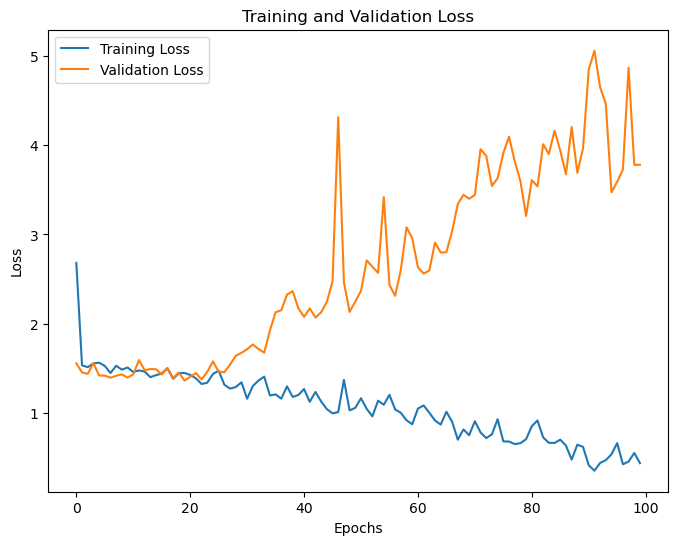

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1.0 / 255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
num_classes = len(train_dataset.class_names)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_dataset,                
    validation_data=validation_dataset,  
    epochs=100                    
)

plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()





